<a href="https://colab.research.google.com/github/xgross11/UPA2_projekt/blob/main/explor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%pip install pandas matplotlib seaborn plotly missingno nbformat scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
from sklearn import preprocessing

penguins = pd.read_csv("penguins_lter.csv")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


--- prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [53]:
print("Jmena sloupcu a jejich typy:\n")
print(penguins.info())

print("\n----------------------------------------\nCharakteristika ciselnych atributu:\n")
print(penguins.describe())

print("\n----------------------------------------\nCharakteristika kategorickych atributu:\n")
include = ['object']
print(penguins.describe(include = include))

print("\n----------------------------------------\nVypis zastoupeni jednotl. hodnot kategorickych atributu")
print("studyName")
print(penguins['studyName'].value_counts())
print("\nSpecies")
print(penguins['Species'].value_counts())
print("\nRegion")
print(penguins['Region'].value_counts())
print("\nIsland")
print(penguins['Island'].value_counts())
print("\nStage")
print(penguins['Stage'].value_counts())
print("\nIndividual ID")
print(penguins['Individual ID'].value_counts())
print("\nClutch Completion")
print(penguins['Clutch Completion'].value_counts())
print("\nDate Egg")
print(penguins['Date Egg'].value_counts())
print("\nSex")
print(penguins['Sex'].value_counts())
print("\nComments")
print(penguins['Comments'].value_counts())

Jmena sloupcu a jejich typy:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C

--- prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

Grafy ciselnych atributu



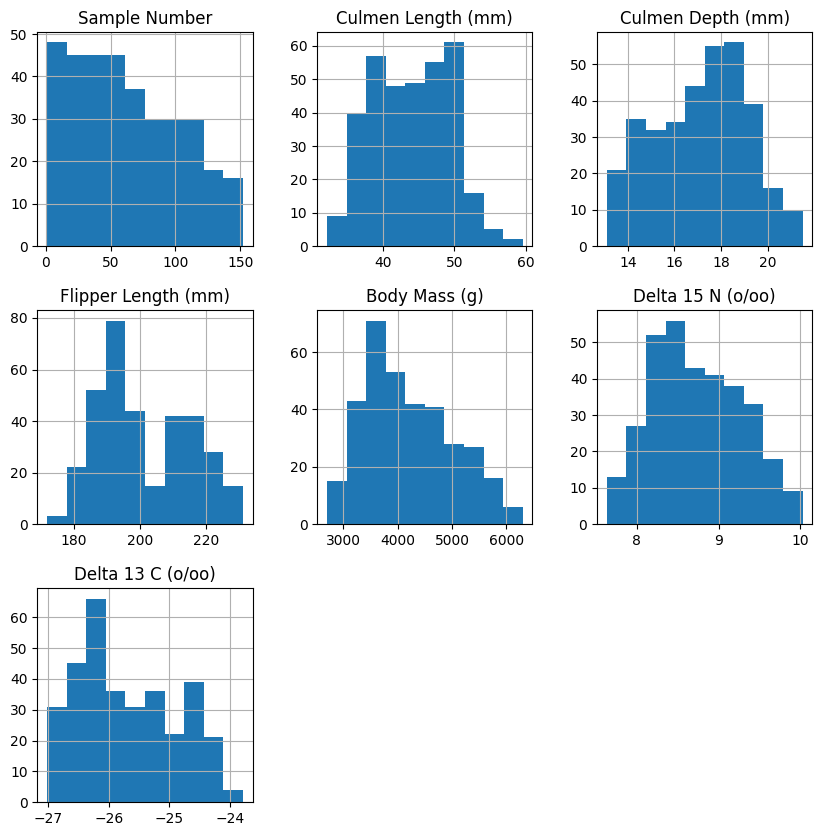

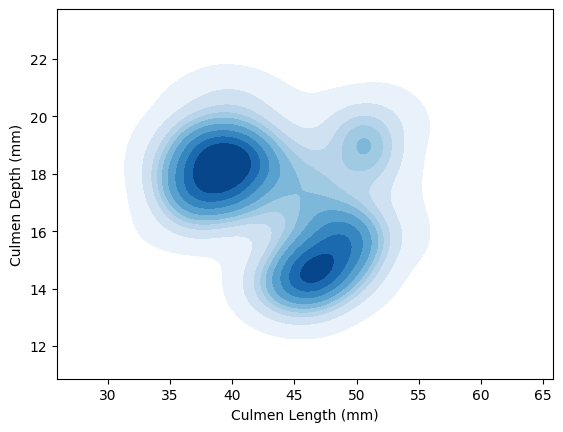

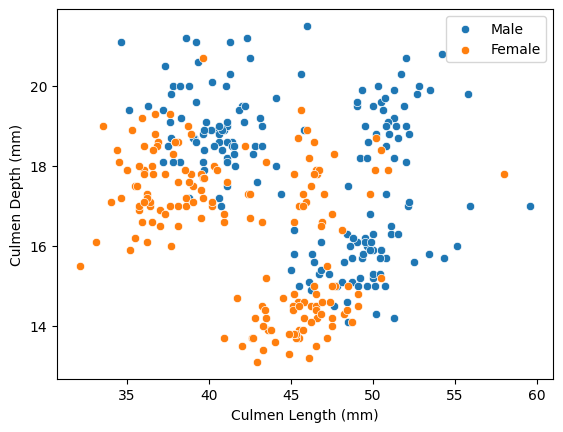

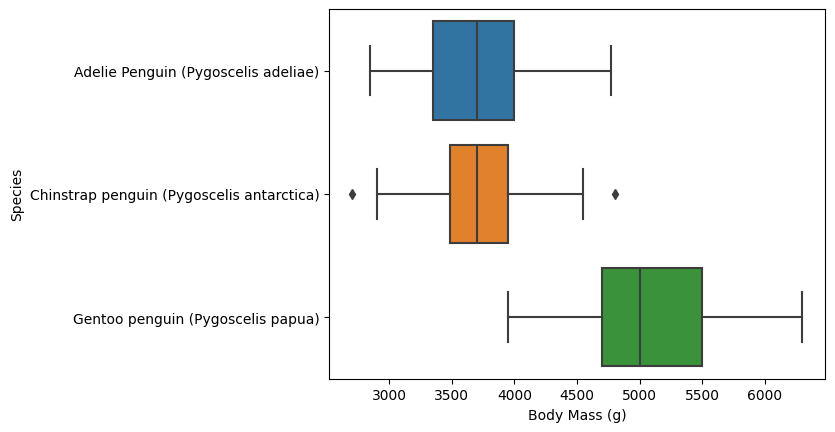


----------------------------------------
Grafy kategorickych atributu



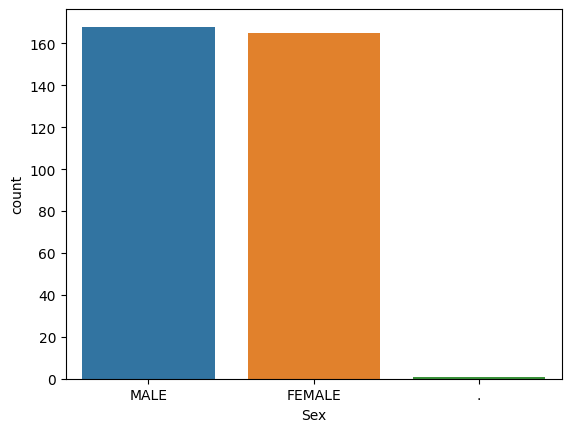

In [54]:
# Culmen Length vs depth for each species
fig = px.scatter(
    penguins,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    color = 'Species',
)
fig.show()

print("Grafy ciselnych atributu\n")

# Matice histogramů číselných atributů
penguins.hist(figsize=(10,10))
plt.show()

# KDE graf
sns.kdeplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", data=penguins, fill=True, cmap="Blues")
plt.show()

sns.scatterplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", data=penguins[penguins['Sex'] == 'MALE'], label="Male")
sns.scatterplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", data=penguins[penguins['Sex'] == 'FEMALE'], label="Female")
plt.legend()
plt.show()

# Krabicový graf
sns.boxplot(x="Body Mass (g)", y="Species", data=penguins)
plt.show()

# Houslový graf
sns.violinplot(x="Sex", y="Body Mass (g)", data=penguins)
plt.show()

# Matice bodových grafů a histogramů
pd.plotting.scatter_matrix(penguins, figsize=(15,15))
plt.show()

print("\n----------------------------------------\nGrafy kategorickych atributu\n")
# Počítací graf kategorických dat
sns.countplot(x="Sex", data=penguins)
plt.show()

# Počítací graf kategorických dat s procenty
ax = sns.countplot(x = 'studyName',data = penguins)
total = float(len(penguins))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

--- zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [55]:
fig = make_subplots(rows = 9, cols = 2, horizontal_spacing = 0.2)
row_no = col_no = 1

for col in penguins.columns:
    if(col != 'Comments'):
      fig.add_trace(
          go.Box(y=penguins[col], name = col),
          row = row_no,
          col = col_no,
      )
      col_no += 1
    if col_no % 3 == 0: # necessary calculations for correctly presenting subplots
        row_no = row_no + 1
        col_no = 1

fig.update_layout(title_text = "Detekce odlehlych hodnot pomoci boxplotu", height=1300, width=1000)
fig.show()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Box(y=penguins["Comments"], name = "Comments")
)
fig.update_layout(width=1000)
fig.show()

--- proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

In [56]:
print("Celkovy pocet chybejicich hodnot\n")
print(penguins.isnull().sum().sum())

print("Procentualni zastoupeni chybejicich hodnot\n")
print(penguins.isnull().sum().sum() / penguins.count().sum() * 100)

print("\n----------------------------------------\nPocet chybejicich hodnot pro jednotlive atributy\n")
print(penguins.isnull().sum())

print("\n----------------------------------------\nProcentuelni zastoupeni nulovych hodnot\n")
print(penguins.isnull().sum() * 100 / penguins.shape[0]) 

print("\n----------------------------------------\nPocet objektu s vice chybejicimi hodnotami\n")
sum_of_objects = 0
for index, row in penguins.iterrows():
    if row.isnull().sum() > 1:
        sum_of_objects = sum_of_objects + 1
print(sum_of_objects)

msno.matrix(penguins)
plt.show()

Celkovy pocet chybejicich hodnot

363
Procentualni zastoupeni chybejicich hodnot

6.618049225159527

----------------------------------------
Pocet chybejicich hodnot pro jednotlive atributy

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

----------------------------------------
Procentuelni zastoupeni nulovych hodnot

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion     

--- proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [57]:
plt.figure(figsize=(10,10))

corr = penguins.corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

plt.show()

# 2. část

--- Odstraňte z datové sady atributy, které jsou pro danou dolovací úlohu irelevantní.

In [58]:
feature_arr = ['studyName', 'Clutch Completion', 'Date Egg', 'Individual ID', "Sample Number", "Comments", 'Region', 'Stage']
penguins.drop(feature_arr, axis = 1, inplace=True, errors = 'ignore')
print(penguins.head())

                               Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.1   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.5   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen                40.3   
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen                 NaN   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen                36.7   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  \
0               18.7                181.0         3750.0    MALE   
1               17.4                186.0         3800.0  FEMALE   
2               18.0                195.0         3250.0  FEMALE   
3                NaN                  NaN            NaN     NaN   
4               19.3                193.0         3450.0  FEMALE   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0                NaN                NaN  
1            8.94956          -24.69454  
2            8.36821      

--- Vypořádejte se s chybějícími hodnotami. Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.

In [59]:
penguins.info()
for col in penguins.columns:
    if penguins[col].dtype != 'object': #for numeric attributes
        penguins[col].fillna(penguins[col].mean(), inplace = True) # using mean to fill null values

penguins= penguins.dropna() #delete rows where is null value
pencsv = penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              334 non-null    object 
 1   Island               334 non-null 

--- Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.

In [60]:
print(penguins.shape)
penguins2 = penguins[penguins.Sex == "."]
adult = penguins.drop(penguins2.index, axis=0)
print(penguins2.shape)
print(adult.shape)

(334, 9)
(1, 9)
(333, 9)


###První varianta datové sady

--- Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.

In [61]:
penguins1 = penguins.copy(deep=True)

penguins1['Culmen Length (mm)'] = pd.cut(penguins1['Culmen Length (mm)'], 3, labels=["short", "medium", "long"])
penguins1['Culmen Depth (mm)'] = pd.cut(penguins1['Culmen Depth (mm)'], 3, labels=["short", "medium", "long"])
penguins1['Flipper Length (mm)'] = pd.cut(penguins1['Flipper Length (mm)'], 3, labels=["short", "medium", "long"])
penguins1['Body Mass (g)'] = pd.cut(penguins1['Body Mass (g)'], 3, labels=["light", "middleweight", "heavy"])
penguins1['Delta 15 N (o/oo)'] = pd.cut(penguins1['Delta 15 N (o/oo)'], 3, labels=["weak", "medium concentrated", "highly concentrated"])
penguins1['Delta 13 C (o/oo)'] = pd.cut(penguins1['Delta 13 C (o/oo)'], 3, labels=["weak", "medium concentrated", "highly concentrated"])

print(penguins1.head())
penguins1.to_csv('penguins_only_categorical_data.csv', index=False)

                               Species     Island Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen              short   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen              short   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen              short   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen              short   
5  Adelie Penguin (Pygoscelis adeliae)  Torgersen              short   

  Culmen Depth (mm) Flipper Length (mm) Body Mass (g)     Sex  \
0            medium               short         light    MALE   
1            medium               short         light  FEMALE   
2            medium              medium         light  FEMALE   
4              long              medium         light  FEMALE   
5              long               short         light    MALE   

     Delta 15 N (o/oo)    Delta 13 C (o/oo)  
0  medium concentrated  medium concentrated  
1  medium concentrated  highly concentrated  
2                 weak  medium concent

### Druhá varianta datové sady

--- Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.

In [62]:
penguins2 = penguins.copy(deep=True)
selection = []

for col in penguins2.columns:
    if penguins2[col].dtype == 'object': #for categoric attributes
      selection.append(col)

print(penguins2.head())
enc = preprocessing.OrdinalEncoder()
enc.fit(penguins2[selection])
penguins2[selection] = enc.transform(penguins2[selection])
print(penguins2.head())

# normalizace na interval <0,1>
min_max_scaler = preprocessing.MinMaxScaler()
penguins2_normalized = min_max_scaler.fit_transform(penguins2)
penguins2_normalized_df = pd.DataFrame(penguins2_normalized)
print(penguins2_normalized_df.head())

penguins2_normalized_df.to_csv('penguins_only_numerical_data.csv', index=False)


                               Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.1   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.5   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen                40.3   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen                36.7   
5  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.3   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  \
0               18.7                181.0         3750.0    MALE   
1               17.4                186.0         3800.0  FEMALE   
2               18.0                195.0         3250.0  FEMALE   
4               19.3                193.0         3450.0  FEMALE   
5               20.6                190.0         3650.0    MALE   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           8.733382         -25.686292  
1           8.949560         -24.694540  
2           8.368210      